In [1]:
"""
Collect Data: Capture and label images of our handwriting.
    [ ] Chelsey
    [ ] Shawn
    [X] Starter data set (MNIST)
    [X] Starter data set (EMNIST Letters)

Preprocess Data: Resize, normalize, and encode the images and labels.

Build a CNN Model: Use Keras to define a CNN suitable for image classification.
Train the Model: Fit the model on your handwriting dataset.
Evaluate and Predict: Assess model accuracy and use it to predict new handwriting samples.
"""

import cv2
import numpy as np
import os
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
import tensorflow_datasets as tfds
import pickle
from PIL import Image, ImageOps
import matplotlib.pyplot as plt

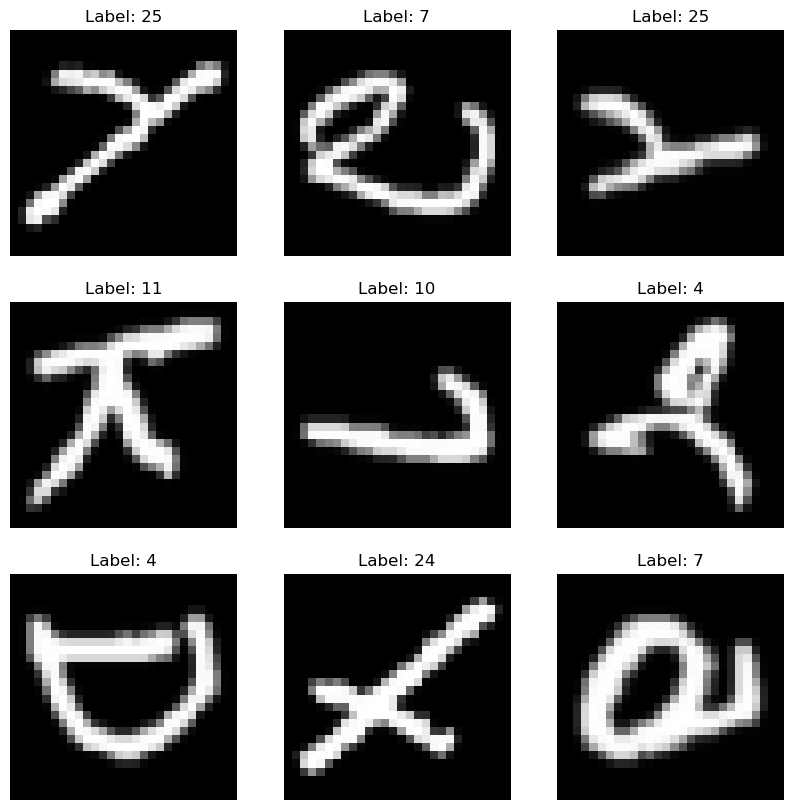

Epoch 1/5


c:\Users\shawn\anaconda3\envs\dev\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2775/2775 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.6168 - loss: 1.3173 - val_accuracy: 0.8178 - val_loss: 0.6040
Epoch 2/5
2775/2775 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8056 - loss: 0.6417 - val_accuracy: 0.8410 - val_loss: 0.5088
Epoch 3/5
2775/2775 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8351 - loss: 0.5378 - val_accuracy: 0.8522 - val_loss: 0.4726
Epoch 4/5
2775/2775 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8477 - loss: 0.4899 - val_accuracy: 0.8585 - val_loss: 0.4501
Epoch 5/5
2775/2775 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8542 - loss: 0.4637 - val_accuracy: 0.8628 - val_loss: 0.4409
463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8642 - loss: 0.4400
Test Accuracy: 0.86


In [2]:
# Load the EMNIST Letters dataset
(train_ds, test_ds), ds_info = tfds.load(
    'emnist/letters',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True
)

# Function to visualize some samples
def plot_samples(dataset, num_samples=9):
    plt.figure(figsize=(10, 10))
    for i, (image, label) in enumerate(dataset.take(num_samples)):
        plt.subplot(3, 3, i + 1)
        plt.imshow(image.numpy().squeeze(), cmap="gray")
        plt.title(f"Label: {label.numpy()}")
        plt.axis('off')
    plt.show()

# Plot some samples from the training dataset
plot_samples(train_ds)

# Preprocessing function to normalize the images
def preprocess(image, label):
    image = tf.cast(image, tf.float32) / 255.0  # Normalize to [0, 1]
    return image, label

# Prepare the datasets for training and evaluation
train_ds = train_ds.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)

# Build a simple neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(27, activation='softmax')  # 26 classes for A-Z letters
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_ds, epochs=5, validation_data=test_ds)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_ds)
print(f"Test Accuracy: {test_accuracy:.2f}")